# Importing Libraries


In [1]:
import os
import numpy as np
import pandas as pd              
import matplotlib.pyplot as plt 
import random

# Configure the notebook to display plots
%matplotlib inline

# Define the path to the data folder
data_dir = '/data/hx_series'

# Specifing the file paths in the data folder which contains training and validation datasets stored in HDF5 format

In [2]:
# training data inputs: x and targets: y
x_train_path = os.path.join(data_dir, 'X_train.hdf')
y_train_path = os.path.join(data_dir, 'y_train.hdf')

# validation data inputs: x and targest: y
x_valid_path = os.path.join(data_dir, 'X_test.hdf')
y_valid_path = os.path.join(data_dir, 'y_test.hdf')

# Loading Data with Pandas

In [3]:
# It should take less than one minute to load the files
X_train = pd.read_hdf(x_train_path)
y_train = pd.read_hdf(y_train_path)
X_valid = pd.read_hdf(x_valid_path)
y_valid = pd.read_hdf(y_valid_path)
print('data load complete')

data load complete


# Visualizing our Data

In [4]:
X_train

ABG Base excess (mEq/L)  ABG FiO2  ABG HCO3 (mEq/L)  \
encounterID absoluteTime                                                        
8           0.000000                          NaN       NaN               NaN   
            0.250000                          NaN       NaN               NaN   
            0.500000                          NaN       NaN               NaN   
            0.583333                          NaN       NaN               NaN   
            0.750000                          NaN       NaN               NaN   
...                                           ...       ...               ...   
16259       87.000000                         NaN       NaN               NaN   
            87.083336                         NaN       NaN               NaN   
            87.666664                         NaN       NaN               NaN   
            88.000000                         NaN       NaN               NaN   
            89.000000                         NaN       NaN               NaN   

                          ABG O2 sat (%)  ABG PCO2 (mmHg)  ABG PO2 (mmHg)  \
encounterID absoluteTime                                                    
8           0.000000                 NaN              NaN             NaN   
            0.250000                 NaN              NaN             NaN   
            0.500000                 NaN              NaN             NaN   
            0.583333                 NaN              NaN             NaN   
            0.750000                 NaN              NaN             NaN   
...                                  ...              ...             ...   
16259       87.000000                NaN              NaN             NaN   
            87.083336                NaN              NaN             NaN   
            87.666664                NaN              NaN             NaN   
            88.000000                NaN              NaN             NaN   
            89.000000                NaN              NaN             NaN   

                          ABG TCO2 (mEq/L)  ABG pH  ALT (SGPT) (units/L)  \
encounterID absoluteTime                                                   
8           0.000000                   NaN     NaN                   NaN   
            0.250000                   NaN     NaN                   NaN   
            0.500000                   NaN     NaN                   NaN   
            0.583333                   NaN     NaN                   NaN   
            0.750000                   NaN     NaN                   NaN   
...                                    ...     ...                   ...   
16259       87.000000                  NaN     NaN                   NaN   
            87.083336                  NaN     NaN                   NaN   
            87.666664                  NaN     NaN                   NaN   
            88.000000                  NaN     NaN                   NaN   
            89.000000                  NaN     NaN                   NaN   

                          AST (SGOT) (units/L)  ...  Vasopressin  Vecuronium  \
encounterID absoluteTime                        ...                            
8           0.000000                       NaN  ...          NaN         NaN   
            0.250000                       NaN  ...          NaN         NaN   
            0.500000                       NaN  ...          NaN         NaN   
            0.583333                       NaN  ...          NaN         NaN   
            0.750000                       NaN  ...          NaN         NaN   
...                                        ...  ...          ...         ...   
16259       87.000000                      NaN  ...          NaN         NaN   
            87.083336                      NaN  ...          NaN         NaN   
            87.666664                      NaN  ...          NaN         NaN   
            88.000000                      NaN  ...          NaN         NaN   
            89.000000

Notice here that there are 265 measurement variables (columns) in total.  We could also ask directly using `len(X_train.columns)`.<br>
The data imported by is a multi-index DataFrame where index "level 0" is the unique patient encounter identifier (`encounterID`) and index "level 1" is the time of each observation in units of hours since the first observation (`absoluteTime`).

Have a quick look at the label data for each patient encounter.  We see it follows the same indexing, but only contains a single binary value for each observation.

In [5]:
y_train

mortalityResponse
encounterID absoluteTime                   
8           0.000000                      1
            0.250000                      1
            0.500000                      1
            0.583333                      1
            0.750000                      1
...                                     ...
16259       87.000000                     1
            87.083336                     1
            87.666664                     1
            88.000000                     1
            89.000000                     1

[1113529 rows x 1 columns]

<a name='01_single'></a>
### 1.3.1 Example: View Data from a Single Encounter

We can look more closely at a single patient visit by specifying the `encounterID` "level 0" index.  To extract just these values, try the following:

In [6]:
X_train.index.levels[0]

Int64Index([    8,    11,    13,    15,    18,    20,    21,    23,    25,
               27,
            ...
            16233, 16236, 16241, 16243, 16244, 16248, 16250, 16254, 16255,
            16259],
           dtype='int64', name='encounterID', length=5000)

The _pandas_ DataFrame is easily converted to a regular Python list using `list()`, as shown in the code following code block.  To demonstrate how to manipulate DataFrame objects, we will select a random patient encounter and extract specific variables.  Run the next cell a few times to get a feel for the variety of data associated with various random patients:

In [7]:
# Select a random patient encounterID from a list of all the encounterID values
eIdx = random.choice(list(X_train.index.levels[0]))

# Specify a few variables to look at
variables = [
    'Age','Heart rate (bpm)','PulseOximetry','Weight',
    'SystolicBP','DiastolicBP','Respiratory rate (bpm)',
    'MotorResponse','Capillary refill rate (sec)'
]

# Note that the full list of variables can be constructed using
# list(X_train.columns.values)

# Have a look at the variables for the selected patient
print('encounterID = {}'.format(eIdx))
print('number of observations = {}'.format(X_train.loc[eIdx].index.shape[0]))
print('max absoluteTime value = {} hours'.format(X_train.loc[eIdx].index[-1]))
X_train.loc[eIdx, variables]

encounterID = 953
number of observations = 303
max absoluteTime value = 118.16666412353516 hours


,Age,Heart rate (bpm),PulseOximetry,Weight,SystolicBP,DiastolicBP,Respiratory rate (bpm),MotorResponse,Capillary refill rate (sec)
absoluteTime,,,,,,,,,
0.000000,2.577850,132.0,100.0,13.7,115.0,49.0,21.0,NaN,NaN
0.066667,2.577858,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
0.083333,2.577860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.166667,2.577869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.200000,2.577873,166.0,100.0,NaN,NaN,NaN,28.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
115.166664,2.590988,141.0,99.0,NaN,101.0,44.0,23.0,NaN,NaN
116.166664,2.591102,134.0,98.0,NaN,94.0,58.0,26.0,6.0,2.0
117.166664,2.591216,123.0,96.0,NaN,110.0,50.0,27.0,NaN,NaN


The number of rows tells us how many observations are included in the patient encounter, and the final `absoluteTime` indicates how many hours long the entire encounter lasted.

To get a look at a variable for a particular patient encounter simply extract that variable from an encounter and plot it using the _pandas_ plot function.

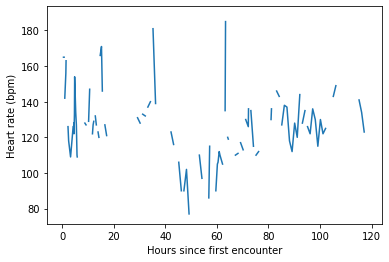

In [8]:
X_train.loc[eIdx, "Heart rate (bpm)"].plot()
plt.ylabel("Heart rate (bpm)")
plt.xlabel("Hours since first encounter")
plt.show()

<a name="01_ex_nobs"></a>
### Observation Count Histogram

In [18]:
# TODO Step 1 - Create a list of `encounterID` values
# Hint: In the single encounter example, we created this list and selected a random choice from it
eIdx_list = X_train.index.levels[0] #FIXME
print('eIdx_list created of length {} (Sanity check: this length should be 5000)'.format(len(eIdx_list)))

eIdx_list created of length 5000 (Sanity check: this length should be 5000)


In [19]:
# Step 2 - Create a list of observation counts for each of these encounters
# The number of observations in each encounter can be extracted as the shape of each individual encounter
nobs_list = [X_train.loc[ix].index.shape[0] for ix in eIdx_list]
print('list of observation counts created of length {} (Sanity check: this length should also be 5000)'.format(len(nobs_list)))

list of observation counts created of length 5000 (Sanity check: this length should also be 5000)


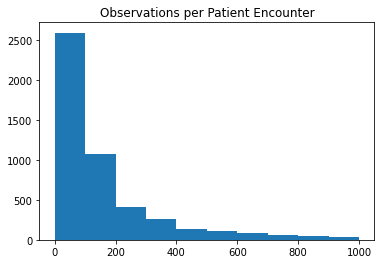

In [20]:
# Step 3 - Create a histogram using MatplotLib
plt.hist(nobs_list,range=(0,1000))
plt.title("Observations per Patient Encounter")
plt.show()

In [21]:
# TODO Step 1 - Create a list of `encounterID` values
# Hint: Earlier in the section, we created this list and selected a random choice from it
eIdx_list = X_train.index.levels[0] #FIXME
print('eIdx_list created of length {} (Sanity check: this length should be 5000)'.format(len(eIdx_list)))

eIdx_list created of length 5000 (Sanity check: this length should be 5000)


In [22]:
# TODO Step 2 - Create a list of `absoluteTime` final for each encounter
# Hint: Use a Python list comprehension over the eIdx_list
timespan_list = [X_train.loc[ix].index[-1] for ix in eIdx_list] #FIXME
print('timespan_list created of length {} (Sanity check: this length should be 5000)'.format(len(timespan_list)))

timespan_list created of length 5000 (Sanity check: this length should be 5000)


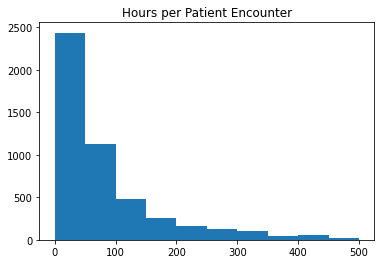

In [23]:
# Step 3 - Create a histogram using MatplotLib
plt.hist(timespan_list,range=(0,500))
plt.title("Hours per Patient Encounter")
plt.show()